In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import math
from sklearn.multiclass import OneVsRestClassifier
import plotly.graph_objects as go

In [14]:
data = pd.read_csv("drug200.csv")
print(data)

     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]


In [15]:
#data["label"] = LabelEncoder().fit_transform(data[["Drug"]])
#data["label"] = data[["Drug"]]
data_label = LabelEncoder().fit(data[["Drug"]]).transform(data[["Drug"]])
#data_label = pd.get_dummies(data["Drug"])
data["Sex_Encoded"] = LabelEncoder().fit_transform(data[["Sex"]])
data["BP_Encoded"] = LabelEncoder().fit_transform(data[["BP"]])
data["Cholesterol_Encoded"] = LabelEncoder().fit_transform(data[["Cholesterol"]])
u_data = data[["Age","Sex_Encoded","BP_Encoded","Cholesterol_Encoded","Na_to_K"]]
print(u_data)

     Age  Sex_Encoded  BP_Encoded  Cholesterol_Encoded  Na_to_K
0     23            0           0                    0   25.355
1     47            1           1                    0   13.093
2     47            1           1                    0   10.114
3     28            0           2                    0    7.798
4     61            0           1                    0   18.043
..   ...          ...         ...                  ...      ...
195   56            0           1                    0   11.567
196   16            1           1                    0   12.006
197   52            1           2                    0    9.894
198   23            1           2                    1   14.020
199   40            0           1                    1   11.349

[200 rows x 5 columns]


In [16]:
result = pd.concat([u_data, pd.DataFrame(data_label)], axis=1)
u_data = result

In [17]:
x_data = u_data[["Age","Sex_Encoded","BP_Encoded","Cholesterol_Encoded","Na_to_K"]]
y_data = u_data.drop(["Age","Sex_Encoded","BP_Encoded","Cholesterol_Encoded","Na_to_K"], axis=1)
y_data

,0
0,0
1,3
2,3
3,4
4,0
...,...
195,3
196,3
197,4
198,4


In [18]:
x_data
y_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       200 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [19]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=4)

In [20]:
X_train.to_numpy().shape

(140, 5)

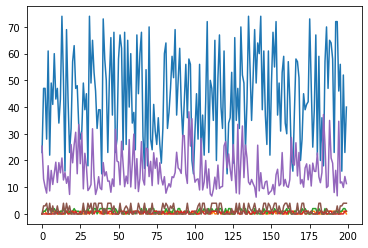

In [21]:
plt.plot(u_data, label="inline_label")

## handwritten classifier- SGD

In [22]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
X = X_train.to_numpy()
Y = y_train
# Always scale the input. The most convenient way is to use a pipeline.
clf = make_pipeline(StandardScaler(),
                     SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X, Y)
#Pipeline(steps=[('standardscaler', StandardScaler()),
#                ('sgdclassifier', SGDClassifier())])
y_predsgd = clf.predict(X_test)
print(clf.predict(X_test))
print(y_test.to_numpy().reshape(1,-1))

from sklearn import metrics
print(metrics.accuracy_score(y_predsgd,y_test))

[0 0 0 0 3 4 0 0 0 1 1 4 1 0 0 0 0 4 1 4 4 4 1 4 4 2 4 0 4 0 1 4 4 4 4 0 1
 1 4 0 0 0 0 4 0 0 0 4 0 0 1 0 4 0 4 2 0 0 4 0]
[[0 0 0 0 3 4 0 0 0 1 1 4 1 0 0 0 0 4 2 3 4 3 1 4 3 2 4 0 4 0 2 3 4 4 4 0
  1 1 4 0 0 0 0 3 0 0 0 4 0 0 1 0 4 0 3 0 0 0 3 0]]
0.8333333333333334


## Logistic Regression(one vs rest)

In [23]:
from sklearn.svm import LinearSVC
from sklearn import metrics
ovr = OneVsRestClassifier(OneVsRestClassifier(LinearSVC(random_state=0))).fit(X_train.to_numpy(),y_train.to_numpy())
y_pred_lr = ovr.predict(X_test)
y_pred_lr

print(metrics.accuracy_score(y_pred_lr,y_test))

0.6833333333333333


# Tree classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred

#!pip install opencv-python
# from sklearn.tree import export_graphviz
# export_graphviz(clf, 'tree.dot', feature_names = ["Age" , "Sex_Encoded"  ,"BP_Encoded" ,"Cholesterol_Encoded", "Na_to_K"])
# import matplotlib.pyplot as plt
# import cv2
# %matplotlib inline
# img = cv2.imread('tree.dot')
# plt.figure(figsize = (20, 20))
# plt.imshow("tree.dot")

TypeError: Image data of dtype <U8 cannot be converted to float

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)


Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [29]:
torch.ones([3,4])

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])